In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


Bad key "text.kerning_factor" on line 4 in
C:\Users\anubh\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("C:\\Users\\anubh\\Downloads\\datasets\\datasets\\diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Findings :
    glucose level : prediabetes 140-199
    BP : zero , can mean diabetes.
    
    


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Analysis

1. columnwise analysis 

In [8]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [67]:
d = df.groupby("Pregnancies")["Outcome"].agg("count")

In [68]:
d

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Outcome, dtype: int64

In [69]:
(df.groupby("Pregnancies")["Outcome"].value_counts()/d)*100

Pregnancies  Outcome
0            0           65.765766
             1           34.234234
1            0           78.518519
             1           21.481481
2            0           81.553398
             1           18.446602
3            0           64.000000
             1           36.000000
4            0           66.176471
             1           33.823529
5            0           63.157895
             1           36.842105
6            0           68.000000
             1           32.000000
7            1           55.555556
             0           44.444444
8            1           57.894737
             0           42.105263
9            1           64.285714
             0           35.714286
10           0           58.333333
             1           41.666667
11           1           63.636364
             0           36.363636
12           0           55.555556
             1           44.444444
13           0           50.000000
             1           50.000000

In [12]:
import seaborn as sns

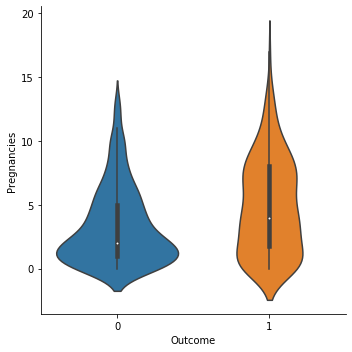

In [13]:
sns.catplot(x= "Outcome",y = "Pregnancies",data = df, kind = "violin");

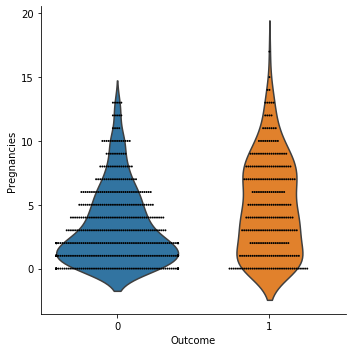

In [14]:
g = sns.catplot(x= "Outcome",y = "Pregnancies",data = df, kind = "violin",inner = None)
sns.swarmplot(x= "Outcome",y = "Pregnancies",data = df,size = 2,ax = g.ax,color = "k");

Finding :
    1) greater the pregnancies greater the chances of diabetes but we need more proof.
    2)

In [15]:
df.groupby(["Pregnancies"])["Age"].mean()

Pregnancies
0     27.603604
1     27.370370
2     27.194175
3     29.026667
4     32.779412
5     39.035088
6     39.340000
7     41.111111
8     45.368421
9     44.178571
10    42.666667
11    44.545455
12    47.444444
13    44.500000
14    42.000000
15    43.000000
17    47.000000
Name: Age, dtype: float64

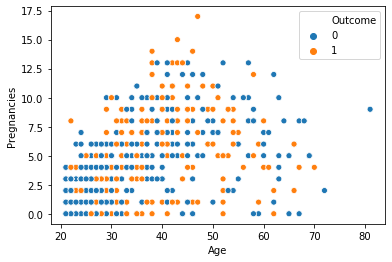

In [16]:
sns.scatterplot(x = "Age",y = "Pregnancies",data = df,hue = "Outcome");

In [17]:
df["BMI"]

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [18]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
df[(df["BMI"]>20) & (df["Outcome"]==1)]["Outcome"].value_counts()

1    266
Name: Outcome, dtype: int64

Finding :
    1) BMI contributes to the diabetes . since out of 268 diabetic patients only two have normal BMI else everyone has BMI above 20

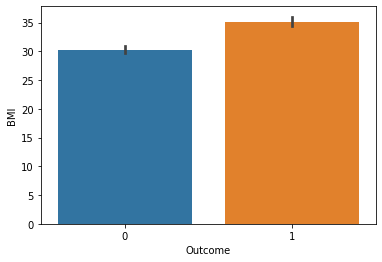

In [20]:
sns.barplot(x= "Outcome",y = "BMI",data = df);

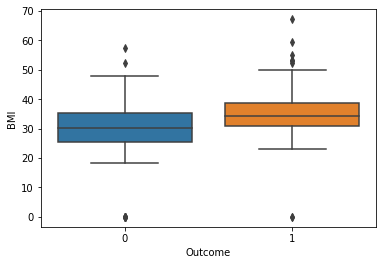

In [21]:
sns.boxplot(x= "Outcome",y="BMI",data = df);

In [22]:
df.groupby(["Outcome"])["BMI"].mean()

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

In [23]:
df[(df["Glucose"]>140) & (df["Outcome"]==1) & (df["BMI"]>20.0)]["Outcome"].value_counts()

1    132
Name: Outcome, dtype: int64

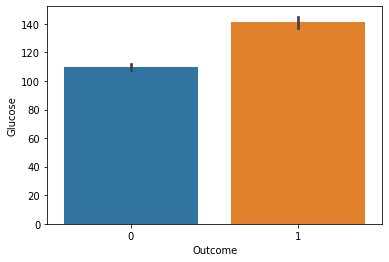

In [24]:
sns.barplot(x= "Outcome",y = "Glucose",data= df);

In [25]:
df.groupby(["Outcome"])["DiabetesPedigreeFunction"].min()

Outcome
0    0.078
1    0.088
Name: DiabetesPedigreeFunction, dtype: float64

In [26]:
df[(df["Age"]<25) & (df["DiabetesPedigreeFunction"]<0.4) & (df["Outcome"]==0)]["Outcome"].value_counts()

0    107
Name: Outcome, dtype: int64

In [27]:
(df["Insulin"]<=70) & (df["Outcome"]==1)

0       True
1      False
2       True
3      False
4      False
       ...  
763    False
764    False
765    False
766     True
767    False
Length: 768, dtype: bool

In [28]:
a = df[((df["Insulin"]<=70) & (df["Outcome"]==1)) | ((df["Insulin"]<=70) & (df["Outcome"]==0))]["Outcome"]

In [29]:
b = df[((df["Insulin"]>70) & (df["Outcome"]==1)) | ((df["Insulin"]>70) & (df["Outcome"]==0))]["Outcome"]

In [30]:
b

3      0
4      1
6      1
8      1
13     1
      ..
751    0
753    1
755    1
763    0
765    0
Name: Outcome, Length: 312, dtype: int64

In [31]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [32]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
l = []
for i,j in df[["Insulin","Outcome"]].iterrows():
    if j["Insulin"]<=70 and j["Outcome"]==0:
        l.append(0)
    elif j["Insulin"]<=70 and j["Outcome"]==1:
        l.append(-1)
    elif j["Insulin"]>70 and j["Outcome"]==0:
        l.append(0)
    elif j["Insulin"]>70 and j["Outcome"]==1:
        l.append(1)
len(l)

768

In [34]:
df["sugar_level"] = pd.Series(l)

In [35]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
sugar_level                   int64
dtype: object

In [36]:
df["sugar_level"] = df["sugar_level"].map({-1:"low",0:"normal",1:"High"})

In [37]:
df.groupby(["Outcome"])["sugar_level"].count()

Outcome
0    500
1    268
Name: sugar_level, dtype: int64

In [38]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'sugar_level'],
      dtype='object')

In [39]:
df["DiabetesPedigreeFunction"].mean()

0.4718763020833327

In [40]:
df.groupby(["Outcome","sugar_level"])["DiabetesPedigreeFunction"].agg(["max","min","mean"])

max    min      mean
Outcome sugar_level                        
0       normal       2.329  0.078  0.429734
1       High         2.288  0.127  0.602659
        low          2.420  0.088  0.506255

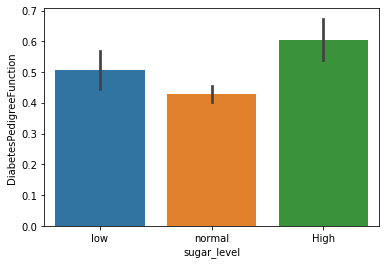

In [41]:
sns.barplot(df["sugar_level"],df["DiabetesPedigreeFunction"]);

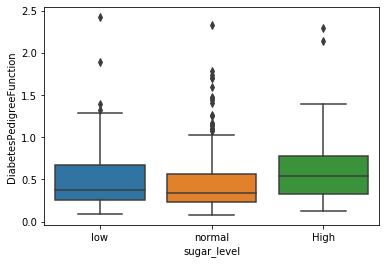

In [42]:
sns.boxplot(df["sugar_level"],df["DiabetesPedigreeFunction"]);

In [43]:
df["Age"].mean()

33.240885416666664

In [44]:
d = df[df["sugar_level"]=="normal"][["BMI","Age"]]

In [45]:
d[d["BMI"]>30.0]

,BMI,Age
7,35.3,29
10,37.6,30
18,43.3,33
20,39.3,27
21,35.4,50
...,...,...
756,32.0,39
758,37.5,26
763,32.9,63
764,36.8,27


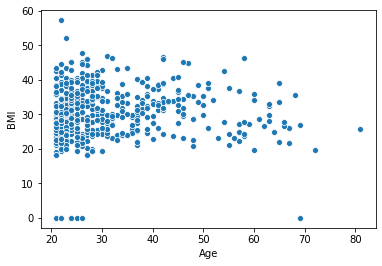

In [46]:
sns.scatterplot(x = d["Age"],y = "BMI",data = d)

In [56]:
df["SkinThickness"].median()

23.0

In [64]:
df[(df["SkinThickness"]>12.0) & (df["Outcome"]==1)]["SkinThickness"].mean()

33.264044943820224

In [61]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

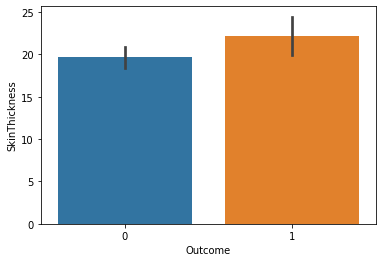

In [63]:
sns.barplot(x = "Outcome",y = "SkinThickness",data = df)

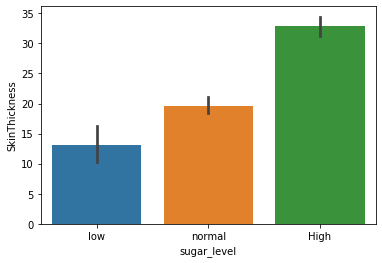

In [65]:
sns.barplot(x = "sugar_level", y = "SkinThickness",data = df);

Finding : 1) the person who is having high blood sugar her skinthickness is more.

In [66]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'sugar_level'],
      dtype='object')

Summary :
- for the sake of health of woman , the no. of Pregnancies should be less which doesnot  alter the BMI of the woman and make her vulnerable to Diabetes.
- they should get right Diet to be able have the right nutrients so that they are not vulnerable to Diabetes either low or high.
- In this analysis we can across the women having too low BP and too low Insulin which can be dangerous for them. we need to make such arrangements wherein they are finding the right medications at the right time.
- Though some of women have high Insulin levels but they still manage to not have diabetes.
- women having high Blood sugar problems have the problem thicker skin in them. while low blood sugar women are having reduced thickness.
- if the dPF is high , then there are chances that women can have diabetes in her early 20's,but yes there are some exceptions as well but these exceptions are only for women having average 3 pregnancies.

    